# Prediction of Housing Prices

#### Cheng Zhang, Ahmed Rizk, Xiwen Wei, Aman Mehra

## Introduction

Due to the large growth of the urban population, housing resources seem to be relatively inadequate (Jiang & Qiu, 2022). Therefore, studying trends in housing prices has become a topic of great concern among economists and the government, due to the importance of real estate valuation on the general state of the population's economic state (Heldak & Pluciennik, 2019). The factors that can influence the housing price include (not limited to): housing area; the number of bedrooms/bathrooms; whether connected to Main Road; whether it has the basic conditions such as the hot-water heater or air-conditioning. Therefore, our team is going to predict what is the expected yield of a housing price (response variable) at a certain value of those factors (explanatory variables), and determine the best subset of factor(s) that produce the most accurate prediction model.

## Description of Dataset and Variables

Our project is focused on prediction by using the following "Housing Prices" dataset https://www.kaggle.com/datasets/yasserh/housing-prices-dataset. It contains information about 546 houses with their prices, along with 12 descriptive variables.

In [ ]:
## describe the variables one by one

## Analysis Question

##### Find the best predictive model to predict housing prices with the appropriately selected input variables.

## Exploratory Data Analysis

### Reading the data into R

In [1]:
library(tidyverse)
library(gridExtra)
library(GGally)

Warning message:
"package 'tidyverse' was built under R version 4.1.3"
-- Attaching packages ------------------------------------------------------------------------------- tidyverse 1.3.2 --
v ggplot2 3.3.6      v purrr   0.3.4 
v tibble  3.1.8      v dplyr   1.0.10
v tidyr   1.2.1      v stringr 1.4.1 
v readr   2.1.2      v forcats 0.5.2 
Warning message:
"package 'ggplot2' was built under R version 4.1.3"
Warning message:
"package 'tibble' was built under R version 4.1.3"
Warning message:
"package 'tidyr' was built under R version 4.1.3"
Warning message:
"package 'readr' was built under R version 4.1.3"
Warning message:
"package 'purrr' was built under R version 4.1.2"
Warning message:
"package 'dplyr' was built under R version 4.1.3"
Warning message:
"package 'stringr' was built under R version 4.1.3"
Warning message:
"package 'forcats' was built under R version 4.1.3"
-- Conflicts ---------------------------------------------------------------------------------- tidyverse_conflic

In [32]:
data <- read.csv("Housing.csv")

First, we look the variables in the dataset, and their types.

In [33]:
glimpse(data)

Rows: 545
Columns: 13
$ price            <int> 13300000, 12250000, 12250000, 12215000, 11410000, 108~
$ area             <int> 7420, 8960, 9960, 7500, 7420, 7500, 8580, 16200, 8100~
$ bedrooms         <int> 4, 4, 3, 4, 4, 3, 4, 5, 4, 3, 3, 4, 4, 4, 3, 4, 4, 3,~
$ bathrooms        <int> 2, 4, 2, 2, 1, 3, 3, 3, 1, 2, 1, 3, 2, 2, 2, 1, 2, 2,~
$ stories          <int> 3, 4, 2, 2, 2, 1, 4, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 4,~
$ mainroad         <chr> "yes", "yes", "yes", "yes", "yes", "yes", "yes", "yes~
$ guestroom        <chr> "no", "no", "no", "no", "yes", "no", "no", "no", "yes~
$ basement         <chr> "no", "no", "yes", "yes", "yes", "yes", "no", "no", "~
$ hotwaterheating  <chr> "no", "no", "no", "no", "no", "no", "no", "no", "no",~
$ airconditioning  <chr> "yes", "yes", "no", "yes", "yes", "yes", "yes", "no",~
$ parking          <int> 2, 3, 2, 3, 2, 2, 2, 0, 2, 1, 2, 2, 1, 2, 0, 2, 1, 2,~
$ prefarea         <chr> "yes", "no", "yes", "yes", "no", "yes", "yes", "no", ~
$ furnishingstatus

We see that our response variable (price) is continuous and numeric. The predictor variables available to us outside 'area' seem to be predominantly categorical.
'Bedrooms', 'Bathrooms' and 'Stories' are all ordinal variables represented numerically, so an important question in the analysis would be whether or not to change them to type 'factor'.

Before we do this, we can first find the correlation matrix of the numeric variables.

In [45]:
datanum <- data[, c(1,2,3,4,5,11)]
head(datanum)

,price,area,bedrooms,bathrooms,stories,parking
,<int>,<int>,<int>,<int>,<int>,<int>
1,13300000,7420,4,2,3,2
2,12250000,8960,4,4,4,3
3,12250000,9960,3,2,2,2
4,12215000,7500,4,2,2,3
5,11410000,7420,4,1,2,2
6,10850000,7500,3,3,1,2


In [46]:
cormat <- round(cor(datanum),2)
head(cormat)

,price,area,bedrooms,bathrooms,stories,parking
price,1.00,0.54,0.37,0.52,0.42,0.38
area,0.54,1.00,0.15,0.19,0.08,0.35
bedrooms,0.37,0.15,1.00,0.37,0.41,0.14
bathrooms,0.52,0.19,0.37,1.00,0.33,0.18
stories,0.42,0.08,0.41,0.33,1.00,0.05
parking,0.38,0.35,0.14,0.18,0.05,1.00


Our correlations are for the most part low, which could be explained by some numeric variables being better represented as 'factor' since they are discrete.
The correlations between predictor variables are also low, indicating that the relationships between them are moderate to weak (which indicates low multicollinearity). We can use VIF scores later on to confirm this theory.

### Cleaning and Wrangling

First, we check any of the rows/values in the dataset are NA.

In [38]:
sum(is.na(data))

[1] 0

Given that there are none, we can move on to transforming the appropriate categorical variables to type "factor".

In [47]:
categcols = c('bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea', 'furnishingstatus')

In [48]:
data[categcols] = lapply(data[categcols], as.factor)

Next, we check the levels of each factor.

In [49]:
lapply(data[categcols], levels)

$bedrooms
[1] "1" "2" "3" "4" "5" "6"

$bathrooms
[1] "1" "2" "3" "4"

$stories
[1] "1" "2" "3" "4"

$mainroad
[1] "no"  "yes"

$guestroom
[1] "no"  "yes"

$basement
[1] "no"  "yes"

$hotwaterheating
[1] "no"  "yes"

$airconditioning
[1] "no"  "yes"

$parking
[1] "0" "1" "2" "3"

$prefarea
[1] "no"  "yes"

$furnishingstatus
[1] "furnished"      "semi-furnished" "unfurnished"

We see that our categorical variables are a mix of binary and ordinal variables. Further modification is unnecessary at this point,
as the lm function in R (to be used later in the analysis) encodes the dummy variables appropriately on its own.

(ordinal does not create dummy variables, factor does. so test both models in final report and pick the one with lower rmse.)

We can then check the class distributions.

In [51]:
summary(data[categcols])

 bedrooms bathrooms stories mainroad  guestroom basement  hotwaterheating
 1:  2    1:401     1:227   no : 77   no :448   no :354   no :520        
 2:136    2:133     2:238   yes:468   yes: 97   yes:191   yes: 25        
 3:300    3: 10     3: 39                                                
 4: 95    4:  1     4: 41                                                
 5: 10                                                                   
 6:  2                                                                   
 airconditioning parking prefarea        furnishingstatus
 no :373         0:299   no :417   furnished     :140    
 yes:172         1:126   yes:128   semi-furnished:227    
                 2:108             unfurnished   :178    
                 3: 12                                   
                                                         
                                                         

It is clear that we have some class imbalances, especially in mainroad, guestroom and hotwaterheating. Visualising the distribution of price for each of the categorical
variables should give us a good idea of the patterns within these classes.

### Visualizations

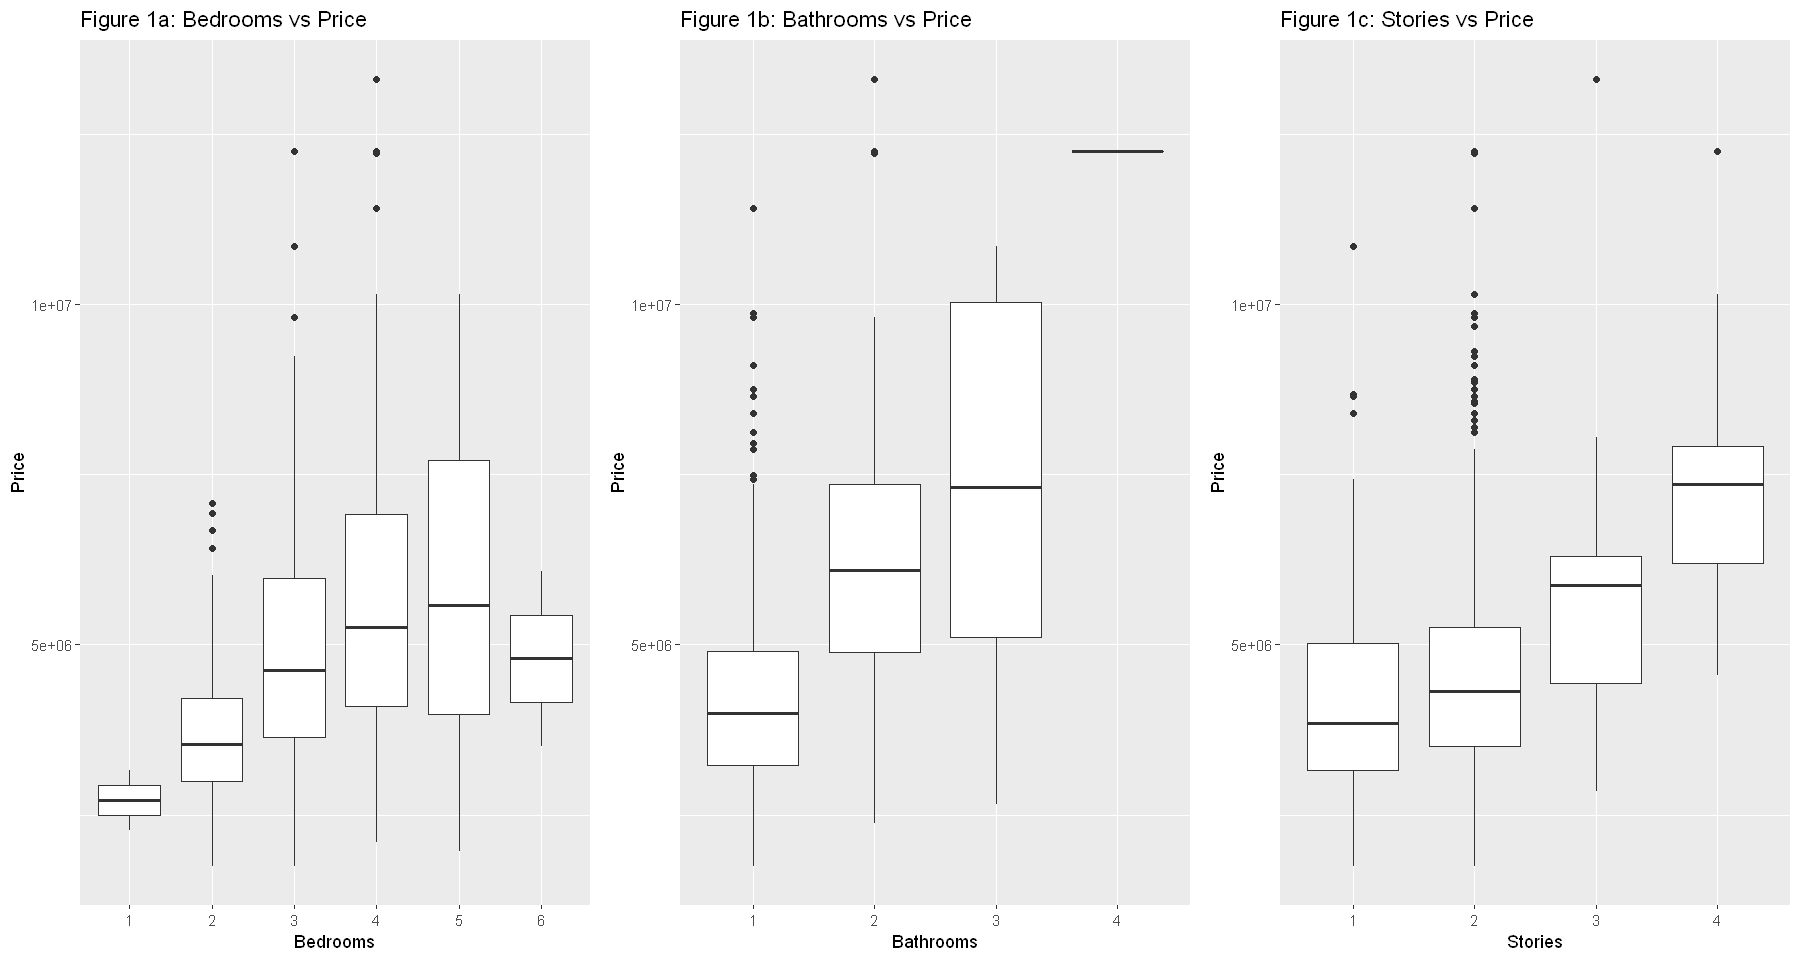

In [9]:
options(repr.plot.width = 15, repr.plot.height = 8) 
bed_box <- ggplot(data, aes(x = bedrooms, y = price)) + geom_boxplot() + 
        ggtitle("Figure 1a: Bedrooms vs Price") + xlab("Bedrooms") + ylab("Price")
bath_box <- ggplot(data, aes(x = bathrooms, y = price)) + geom_boxplot() + 
        ggtitle("Figure 1b: Bathrooms vs Price") + xlab("Bathrooms") + ylab("Price")
stories_box <- ggplot(data, aes(x = stories, y = price)) + geom_boxplot() + 
        ggtitle("Figure 1c: Stories vs Price") + xlab("Stories") + ylab("Price")
grid.arrange(bed_box, bath_box, stories_box, ncol=3, widths = c(6,6,6))

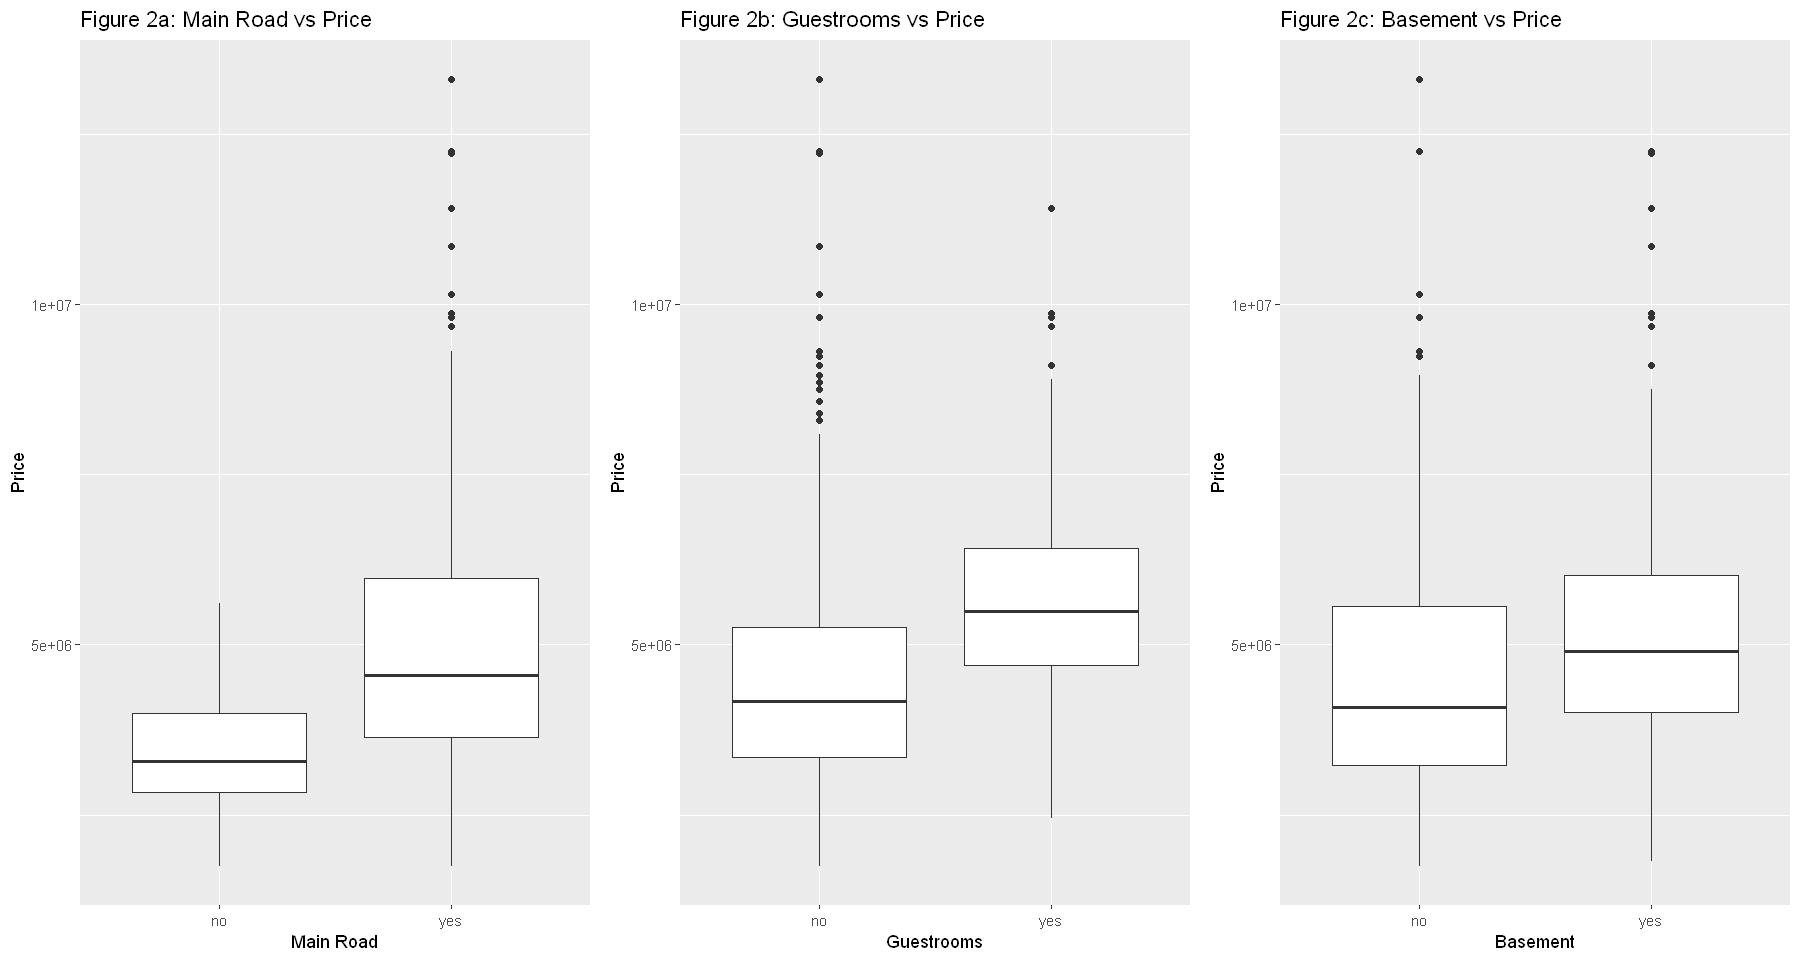

In [10]:
options(repr.plot.width = 15, repr.plot.height = 8) 
main_box <- ggplot(data, aes(x = mainroad, y = price)) + geom_boxplot() + 
        ggtitle("Figure 2a: Main Road vs Price") + xlab("Main Road") + ylab("Price")
guest_box <- ggplot(data, aes(x = guestroom, y = price)) + geom_boxplot() + 
        ggtitle("Figure 2b: Guestrooms vs Price") + xlab("Guestrooms") + ylab("Price")
base_box <- ggplot(data, aes(x = basement, y = price)) + geom_boxplot() + 
        ggtitle("Figure 2c: Basement vs Price") + xlab("Basement") + ylab("Price")
grid.arrange(main_box, guest_box, base_box, ncol=3, widths = c(6,6,6))

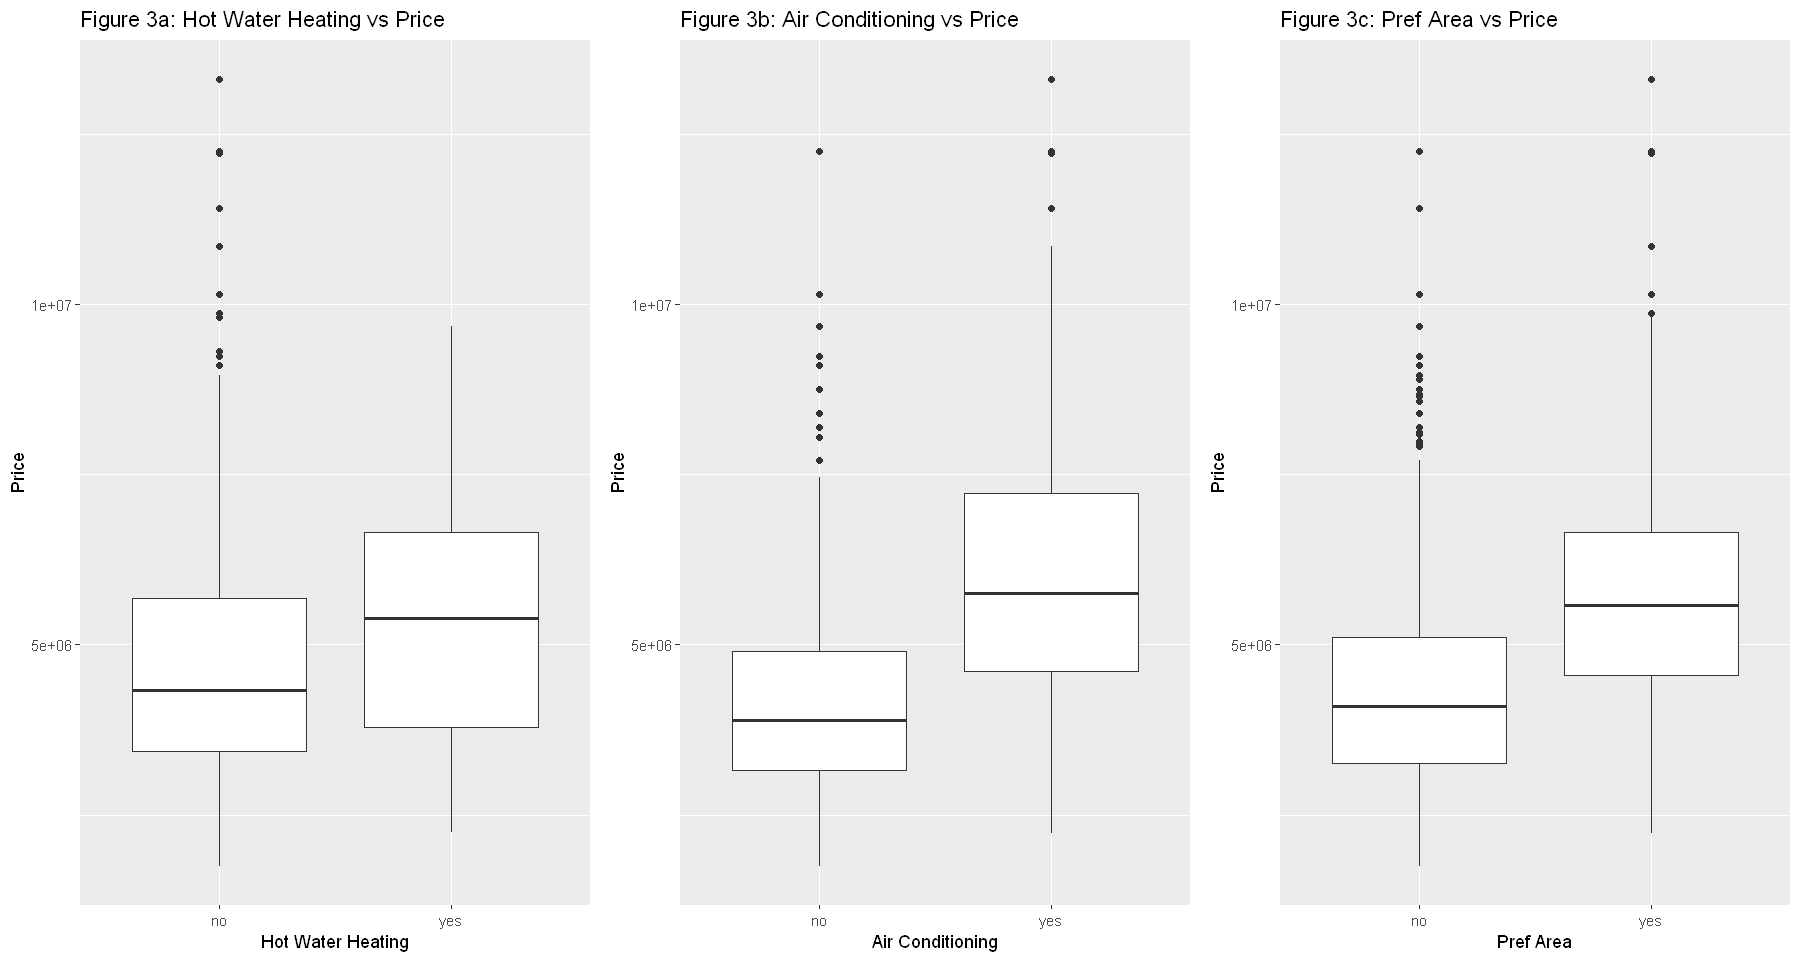

In [11]:
options(repr.plot.width = 15, repr.plot.height = 8) 
hwh_box <- ggplot(data, aes(x = hotwaterheating, y = price)) + geom_boxplot() + 
        ggtitle("Figure 3a: Hot Water Heating vs Price") + xlab("Hot Water Heating") + ylab("Price")
ac_box <- ggplot(data, aes(x = airconditioning, y = price)) + geom_boxplot() + 
        ggtitle("Figure 3b: Air Conditioning vs Price") + xlab("Air Conditioning") + ylab("Price")
prefarea_box <- ggplot(data, aes(x = prefarea, y = price)) + geom_boxplot() + 
        ggtitle("Figure 3c: Pref Area vs Price") + xlab("Pref Area") + ylab("Price")
grid.arrange(hwh_box, ac_box, prefarea_box, ncol=3, widths = c(6,6,6))

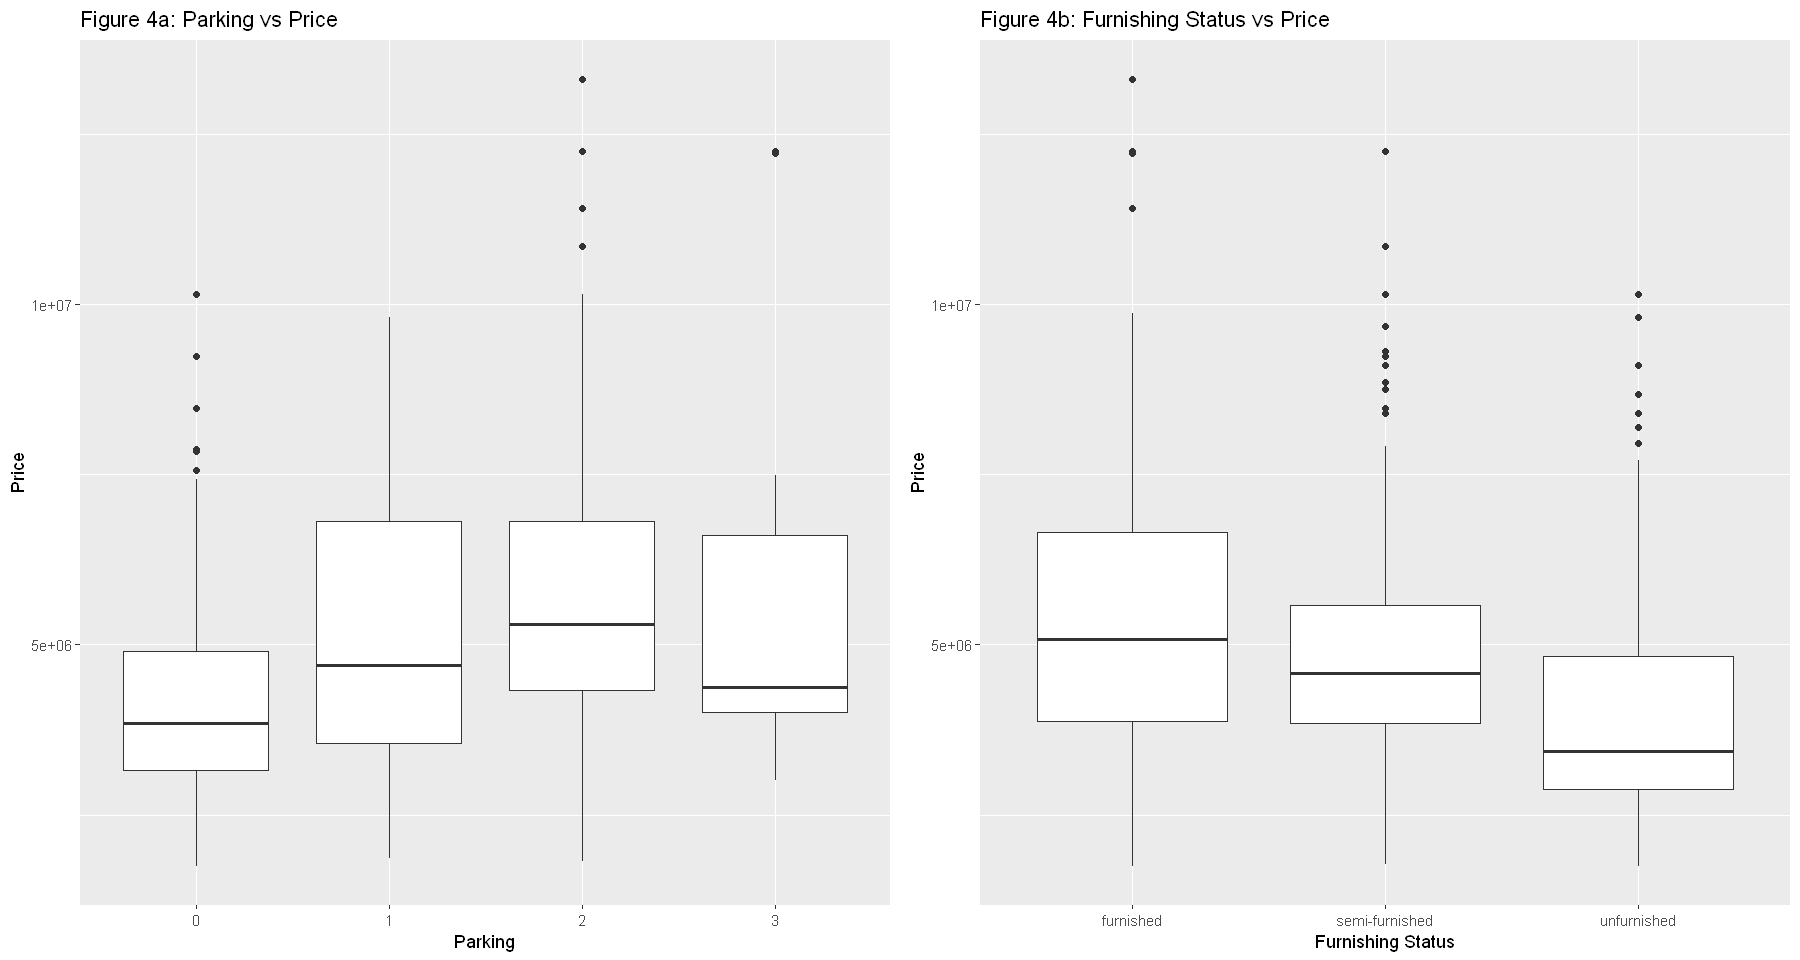

In [12]:
options(repr.plot.width = 15, repr.plot.height = 8) 
parking_box <- ggplot(data, aes(x = parking, y = price)) + geom_boxplot() + 
        ggtitle("Figure 4a: Parking vs Price") + xlab("Parking") + ylab("Price")
fs_box <- ggplot(data, aes(x = furnishingstatus, y = price)) + geom_boxplot() + 
        ggtitle("Figure 4b: Furnishing Status vs Price") + xlab("Furnishing Status") + ylab("Price")
grid.arrange(parking_box, fs_box, ncol=2, widths = c(6,6))

`geom_smooth()` using formula 'y ~ x'



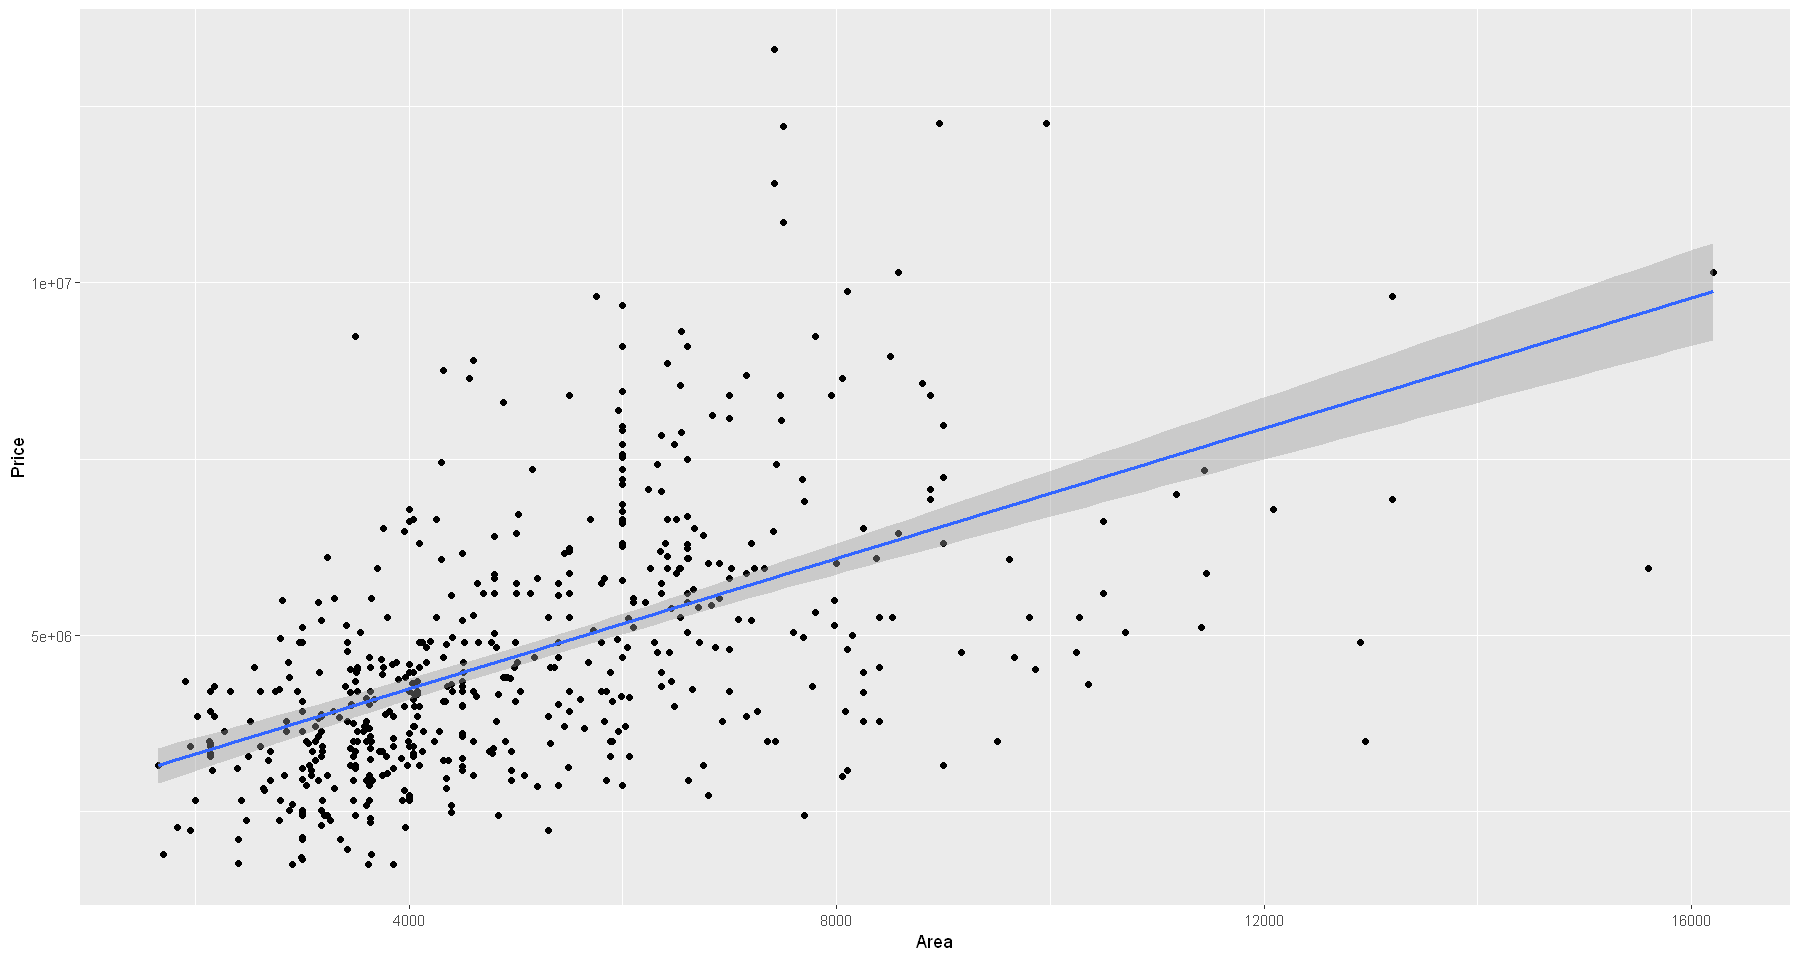

In [54]:
ggplot(data, aes(x = area, y = price)) + geom_point() + geom_smooth(method = "lm") + xlab("Area") + ylab("Price")

In [25]:
cor(data$price, data$area)

[1] 0.5359973

(moderately positive correlation but not strong)

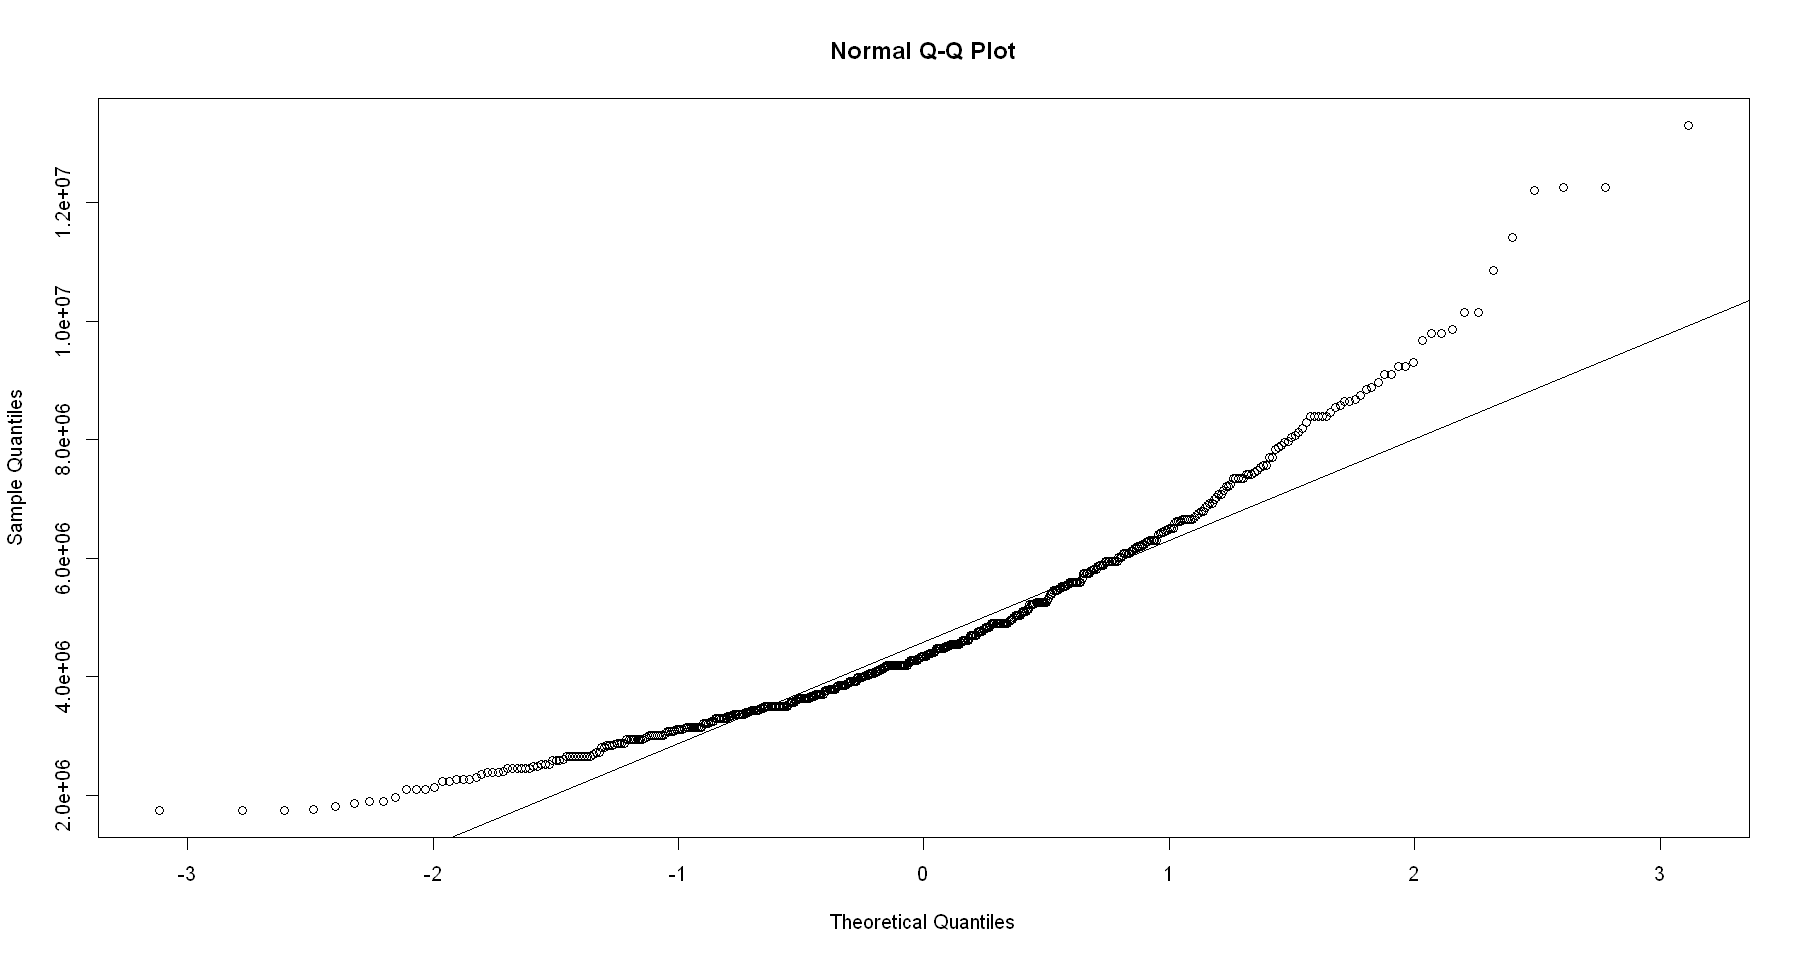

In [57]:
qqnorm(data$price)
qqline(data$price)

(maybe take this out?)

## Methods 

### Description of Methods:

1. Using the numerical representation, we first investigate if there is multicollinearity among the numeric predictor variables and drop those associated with the largest VIFs. 
2. Using least squares regression, we will create several linear models to predict the response variable (house price).
3. The best model will be chosen by using a forward selection algorithm and comparing different statistics such as the Mallows Cp value, which will select the appropriate input variables.
4. We repeat this process using the other dataset with categorical variables represented as 'factor'.
5. We then create a least squares regression model using the selected input variables and train both models on the training dataset.
6. We go on to make predictions for the test data set values and then find the mean squared error to check the efficiency of both models. The model with the lowest rmse would be the best model.

1. What do you expect to achieve? 

We expect to find a predictive linear model with the best subset of input variables, represented appropriately, that produces the lowest rmse.
This model would enable us to predict housing prices on deployment data to a good extent, assuming our sample dataset is representative of the population.

2. What impact could your results have?

Understand the key factors that affect the house prices. As owners, we can increase the room rent reasonably by enhancing the important factors that positively affect the prices. As renters, we can properly analyze the shining points of different types of houses and choose the most cost-effective one.

3. How is the report trustworthy? 

Our dataset consists of randomly and independently selected 545 observations, and no NA values in any column. This means that the data follows a normal distribution due to the large sample size, by fulfilling the conditions of the central limit theorem. We will deal with the presence of multicollinearity, which will make our final model less sensitive to small changes in the dataset (and less overfit on the training data). We will also use forward selection to choose the best variables for the predictive model, which means our model will only use the necessary amount of predictors. Therefore, our model should generalize well to new data due to having low variance. 

We will also evaluate our model using a testing dataset (which is still large enough by the conditions of the CLT), to approximate the error on new data.
This approximated error will then be used to choose our final model, and so our idea of the deployment error will not be underestimated (as it is not based on the training data used to fit the model).


### References

Heldak, M., & Pluciennik, M. (2019). Financing housing support programs in poland in the                                 light of national housing resources. IOP Conference Series. Materials Science and   Engineering, 471(11), 112031. https://doi.org/10.1088/1757-899X/471/11/112031

Jiang, Y., & Qiu, L. (2022). Empirical study on the influencing factors of housing price –––Based on cross-section data of 31 provinces and cities in china. Procedia Computer Science, 199, 1498-1504. https://doi.org/10.1016/j.procs.2022.01.191
